In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [9]:
# Load Data
df = pd.read_csv("Philippine_Household_Electricity.csv")

In [10]:
# I.B.1: Clean Data (already done, but double check nulls)
print("Null Values:\n", df.isnull().sum())

Null Values:
 Household_ID        0
Num_Occupants       0
House_Size_sqm      0
Monthly_kWh_Used    0
Monthly_Bill_PHP    0
dtype: int64


In [11]:
# I.B.2: Confirm 100+ entries
print("\nTotal Valid Entries:", len(df))


Total Valid Entries: 100


In [14]:
# I.B.3: NumPy Operations
mean_kwh = np.mean(df['Monthly_kWh_Used'])
std_kwh = np.std(df['Monthly_kWh_Used'])
median_kwh = np.median(df['Monthly_kWh_Used'])
min_kwh = np.min(df['Monthly_kWh_Used'])
max_kwh = np.max(df['Monthly_kWh_Used'])

print("\nNumPy Operations")
print("Mean:", mean_kwh)
print("Standard Deviation:", std_kwh)
print("Median:", median_kwh)
print("Min:", min_kwh)
print("Max:", max_kwh)


NumPy Operations
Mean: 354.8935000000001
Standard Deviation: 106.11942879016077
Median: 361.78
Min: 147.49
Max: 735.27


In [15]:
# I.B.3: SciPy Operation - Correlation
corr, p_value = pearsonr(df['Num_Occupants'], df['Monthly_kWh_Used'])
print("\nSciPy Correlation:")
print("Correlation Coefficient:", corr)
print("P-value:", p_value)


SciPy Correlation:
Correlation Coefficient: 0.032106886370986354
P-value: 0.751157099236948


In [16]:
# I.B.3: Statsmodels - Simple Linear Regression
X = df['Num_Occupants']
Y = df['Monthly_kWh_Used']
X = sm.add_constant(X)  # Adds constant term for intercept
model = sm.OLS(Y, X).fit()
print("\nStatsmodels OLS Regression Results:")
print(model.summary())


Statsmodels OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:       Monthly_kWh_Used   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1011
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.751
Time:                        01:17:58   Log-Likelihood:                -608.30
No. Observations:                 100   AIC:                             1221.
Df Residuals:                      98   BIC:                             1226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const    

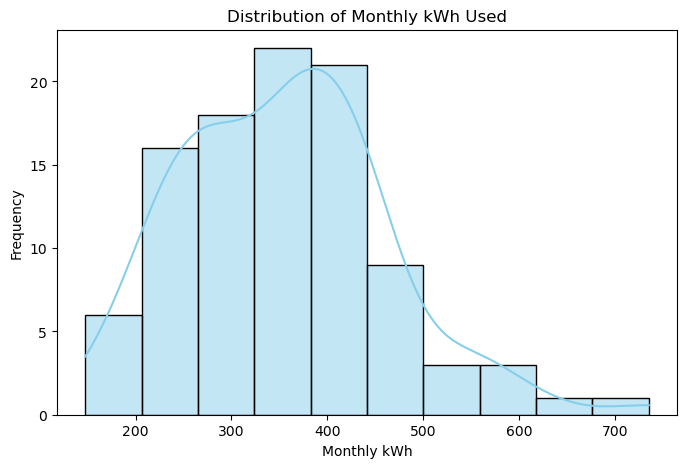

In [17]:
# I.B.4: Visualization 1 - Distribution of kWh Used
plt.figure(figsize=(8, 5))
sns.histplot(df['Monthly_kWh_Used'], kde=True, color='skyblue')
plt.title('Distribution of Monthly kWh Used')
plt.xlabel('Monthly kWh')
plt.ylabel('Frequency')
plt.show()

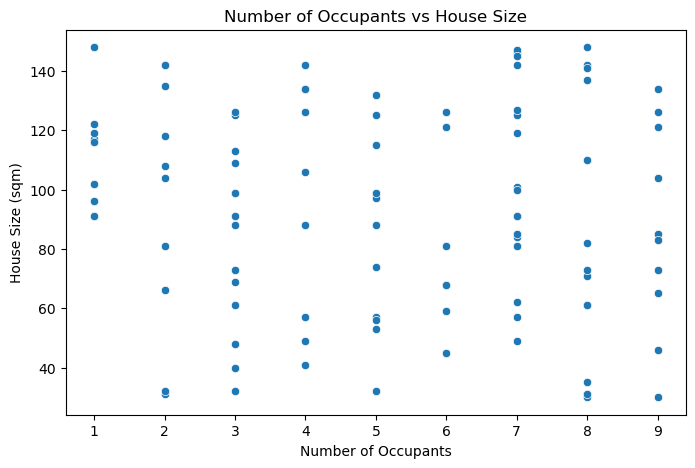

In [18]:
# I.B.4: Visualization 2 - Occupants vs. House Size
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Num_Occupants', y='House_Size_sqm', data=df)
plt.title('Number of Occupants vs House Size')
plt.xlabel('Number of Occupants')
plt.ylabel('House Size (sqm)')
plt.show()

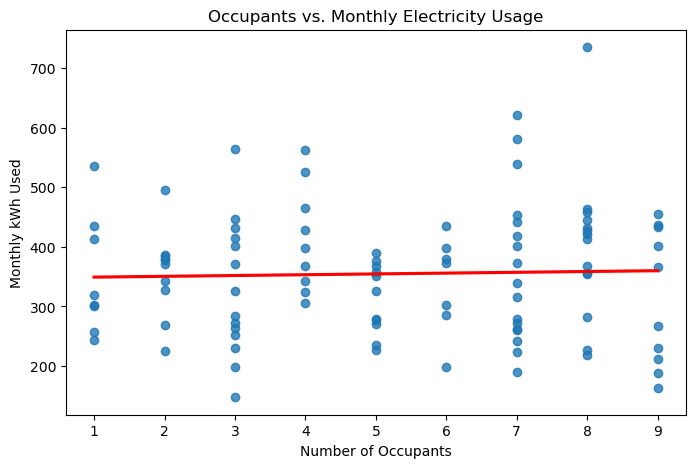

In [19]:
# I.B.5: Correlation Plot with Regression Line
plt.figure(figsize=(8, 5))
sns.regplot(x='Num_Occupants', y='Monthly_kWh_Used', data=df, ci=None, line_kws={"color":"red"})
plt.title('Occupants vs. Monthly Electricity Usage')
plt.xlabel('Number of Occupants')
plt.ylabel('Monthly kWh Used')
plt.show()